*Josh Albano, Sharon Jan, and Luke Sherman (that's me)*

*2020.5.6*

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pandas.plotting import register_matplotlib_converters

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import re




from IPython.display import display, Latex, Markdown

#  Research plan?

### Research Question: Can counties' responses to COVID-19 accurately predict various political features?

Workplan:
- Clean data
    - Remove US territories (Sharon)
    - 
- Define political features
    - Republican/Democratic governor (binary) (Sharon)
    - Joshua's R/D scale (categorical) (Josh)
    - % of counties that are Republican (Sharon)
- Define potential COVID-19 features
    - Google's mobility rating (Josh)
    - Date of stay at home orders, relative to a case threshold (Luke)
        - Should we transform the case threshold to per capita
    - "Performance" - Beta_2 for quadratic model (Luke)
- Create model(s)
- Data visualizations

# EDA
## Taking a look at the dataset



In [2]:
# Looking at the data

states_df = pd.read_csv("4.18states.csv")


In [3]:
counties_df = pd.read_csv("abridged_couties.csv")
# Added to get rid of U.S. territories - Sharon
counties_df = counties_df[counties_df['State'].notna()]

In [4]:
time_cases_df = pd.read_csv("time_series_covid19_confirmed_US.csv")

In [5]:
time_deaths_df = pd.read_csv("time_series_covid19_deaths_US.csv")

In [6]:
counties_df.columns

Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'P

In [7]:
time_cases_df.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4

In [8]:
time_deaths_df.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population',
       '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20'

# Let's look at the basics

Let's look at the distribution of stay at home orders by county:

Text(0.5, 1.0, 'Distribution of stay at home orders by US county')

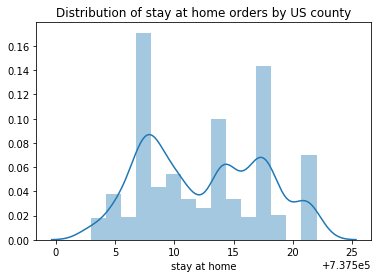

In [9]:
sns.distplot(counties_df["stay at home"].dropna())

plt.title("Distribution of stay at home orders by US county")

#I haven't figured out the date formatting here, but need to do that!

In [10]:
us = time_cases_df.groupby("Country_Region").sum().iloc[:,15:].to_numpy().flatten()

Text(0.5, 1.0, 'Cumuative cases since Feb')

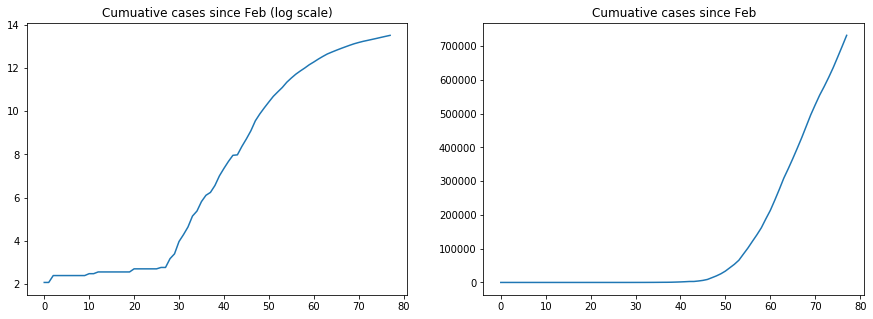

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(np.arange(0,len(us)), np.log(us))

ax[0].set_title("Cumuative cases since Feb (log scale)")

ax[1].plot(np.arange(0,len(us)), us)

ax[1].set_title("Cumuative cases since Feb")

Text(0.5, 1.0, 'Daily new cases since Feb')

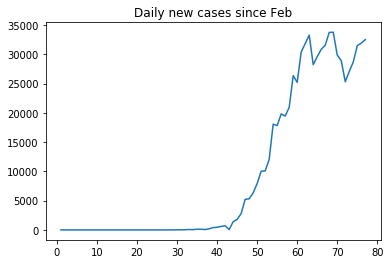

In [12]:
plt.plot(np.arange(1,len(us)), np.diff(us) )
plt.title("Daily new cases since Feb")

<BarContainer object of 77 artists>

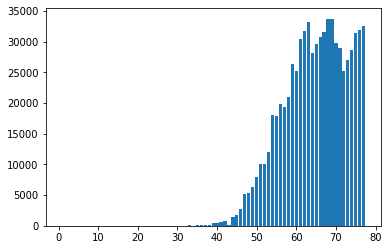

In [13]:
# Same as above, but in bar graph form

plt.bar(np.arange(1,len(us)), np.diff(us) )

Okay, now what I really want to do is understand how "stay at home orders" impact the new daily cases by county.

## Addressing the date time conversion on time series data

In [14]:
# The date objects were extremely annoying, so I built this function to convert them to pandas

def convert_ordinal_date_series_to_pd_date(series_object):
    """
    This function takes a series object of ordinal dates (days from the beginning of the 
    Gregorian calendar) and returns a pandas date time object series
    """
    
    #series_object = series_object.astype(int)
    
    k = []
    y = 0
    
    for ordinal_date in series_object:
        if np.isnan(ordinal_date) == True:
            y += 1
            k.append(np.nan)
            
        else:
            ordinal_date = int(ordinal_date)
            k.append(pd.to_datetime(datetime.datetime.fromordinal(ordinal_date)))
    print("Your series has", y, "NaNs. This function converts them to NaTs.")
    return pd.Series(k, index = series_object.index)

In [262]:
# Let's test this function
# Alameda closed on March 17. Let's see if we can get that

index = counties_df[counties_df["CountyName"] == "Alameda"]["stay at home"].index
print("\n Date Alameda County closed:",convert_ordinal_date_series_to_pd_date(counties_df["stay at home"])[index].iloc[0])


# okay so this is interesting. This dataset only includes the state shutdowns orders, even though it
# seems to be at the county level...


#print("\n", counties_df[counties_df["StateName"]=="CA"]["stay at home"])


print("\n This shows that all the counties had stay at home orders on the same day, even though Alameda issued a county order earlier")

print("\n Anyway, the function works and gets the date converstion right.")

Your series has 490 NaNs. This function converts them to NaTs.

 Date Alameda County closed: 2020-03-19 00:00:00

 This shows that all the counties had stay at home orders on the same day, even though Alameda issued a county order earlier

 Anyway, the function works and gets the date converstion right.


In [275]:
ids = ["FIPS","Admin2", "Province_State", "Country_Region"]

date_column_begin = 11

dates = pd.to_datetime(time_cases_df.columns[date_column_begin:])

df = time_cases_df[ids + list(time_cases_df.columns[date_column_begin:])]

df = df.melt(ids)

#date = look at old code?

df["date"] = date

# df = df.rename(columns = {"value" : "cases"})

# table = df.pivot_table(values = "cases", index = [ "Province_State", "date"],  aggfunc=sum).reset_index()

# table


Province_State     date  cases
0           Alabama  1/22/20      0
1           Alabama  1/23/20      0
2           Alabama  1/24/20      0
3           Alabama  1/25/20      0
4           Alabama  1/26/20      0
5           Alabama  1/27/20      0
6           Alabama  1/28/20      0
7           Alabama  1/29/20      0
8           Alabama  1/30/20      0
9           Alabama  1/31/20      0
10          Alabama   2/1/20      0
11          Alabama  2/10/20      0
12          Alabama  2/11/20      0
13          Alabama  2/12/20      0
14          Alabama  2/13/20      0
15          Alabama  2/14/20      0
16          Alabama  2/15/20      0
17          Alabama  2/16/20      0
18          Alabama  2/17/20      0
19          Alabama  2/18/20      0
20          Alabama  2/19/20      0
21          Alabama   2/2/20      0
22          Alabama  2/20/20      0
23          Alabama  2/21/20      0
24          Alabama  2/22/20      0
25          Alabama  2/23/20      0
26          Alabama  2/24/20      0
27          Alabama  2/25/20      0
28          Alabama  2/26/20      0
29          Alabama  2/27/20      0
...             ...      ...    ...
5074        Wyoming  3/27/20     70
5075        Wyoming  3/28/20     82
5076        Wyoming  3/29/20     86
5077        Wyoming   3/3/20      0
5078        Wyoming  3/30/20     94
5079        Wyoming  3/31/20    109
5080        Wyoming   3/4/20      0
5081        Wyoming   3/5/20      0
5082        Wyoming   3/6/20      0
5083        Wyoming   3/7/20      0
5084        Wyoming   3/8/20      0
5085        Wyoming   3/9/20      0
5086        Wyoming   4/1/20    130
5087        Wyoming  4/10/20    239
5088        Wyoming  4/11/20    261
5089        Wyoming  4/12/20    270
5090        Wyoming  4/13/20    275
5091        Wyoming  4/14/20    282
5092        Wyoming  4/15/20    287
5093        Wyoming  4/16/20    296
5094        Wyoming  4/17/20    305
5095        Wyoming  4/18/20    309
5096        Wyoming   4/2/20    150
5097        Wyoming   4/3/20    162
5098        Wyoming   4/4/20    187
5099        Wyoming   4/5/20    197
5100        Wyoming   4/6/20    210
5101        Wyoming   4/7/20    216
5102        Wyoming   4/8/20    221
5103        Wyoming   4/9/20    230

[5104 rows x 3 columns]

In [276]:
ca = table[table["Province_State"] == "California"]

J = np.array([np.nan])

ca.loc[:,"daily_new_cases"] = np.concatenate([J, np.diff(ca["cases"])])

ca

Province_State     date  cases  daily_new_cases
440     California  1/22/20      0              NaN
441     California  1/23/20      0              0.0
442     California  1/24/20      0              0.0
443     California  1/25/20      0              0.0
444     California  1/26/20      2              2.0
445     California  1/27/20      2              0.0
446     California  1/28/20      2              0.0
447     California  1/29/20      2              0.0
448     California  1/30/20      2              0.0
449     California  1/31/20      3              1.0
450     California   2/1/20      3              0.0
451     California  2/10/20      6              3.0
452     California  2/11/20      7              1.0
453     California  2/12/20      7              0.0
454     California  2/13/20      8              1.0
455     California  2/14/20      8              0.0
456     California  2/15/20      8              0.0
457     California  2/16/20      8              0.0
458     California  2/17/20      8              0.0
459     California  2/18/20      8              0.0
460     California  2/19/20      8              0.0
461     California   2/2/20      3             -5.0
462     California  2/20/20      8              5.0
463     California  2/21/20     10              2.0
464     California  2/22/20     10              0.0
465     California  2/23/20     10              0.0
466     California  2/24/20     10              0.0
467     California  2/25/20     10              0.0
468     California  2/26/20     10              0.0
469     California  2/27/20     11              1.0
..             ...      ...    ...              ...
498     California  3/27/20   4657            758.0
499     California  3/28/20   5095            438.0
500     California  3/29/20   5852            757.0
501     California   3/3/20     25          -5827.0
502     California  3/30/20   7138           7113.0
503     California  3/31/20   8210           1072.0
504     California   3/4/20     35          -8175.0
505     California   3/5/20     51             16.0
506     California   3/6/20     59              8.0
507     California   3/7/20     81             22.0
508     California   3/8/20     95             14.0
509     California   3/9/20    101              6.0
510     California   4/1/20   9399           9298.0
511     California  4/10/20  21081          11682.0
512     California  4/11/20  21706            625.0
513     California  4/12/20  22795           1089.0
514     California  4/13/20  23931           1136.0
515     California  4/14/20  25356           1425.0
516     California  4/15/20  26686           1330.0
517     California  4/16/20  27677            991.0
518     California  4/17/20  29157           1480.0
519     California  4/18/20  30491           1334.0
520     California   4/2/20  10773         -19718.0
521     California   4/3/20  12004           1231.0
522     California   4/4/20  12837            833.0
523     California   4/5/20  15034           2197.0
524     California   4/6/20  16019            985.0
525     California   4/7/20  17351           1332.0
526     California   4/8/20  18897           1546.0
527     California   4/9/20  19710            813.0

[88 rows x 4 columns]

In [267]:
threshold = 300
ca = ca[ca["cases"] >= threshold]
ca["days_since_threshold"] = np.arange(0,len(ca))

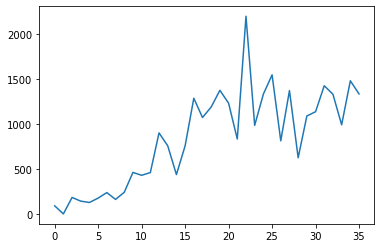

In [268]:
plt.plot(ca["days_since_threshold"], ca["daily_new_cases"])

In [269]:
lm = LinearRegression()

x = np.array(ca["days_since_threshold"]).reshape(-1,1)

y = np.array(ca["daily_new_cases"]).reshape(-1,1)

lm.fit(x,y)

y_hat = lm.predict(x)

$new.cases = \beta_0 + \beta_1~time$

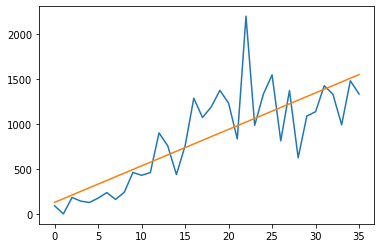

In [270]:
#fig, ax = plt.subplots(1,2, figsize=(15,5))

plt.plot(ca["days_since_threshold"], (ca["daily_new_cases"]))
plt.plot(ca["days_since_threshold"], y_hat)

In [271]:
lm = LinearRegression()

ca["days_since_threshold^2"] = ca["days_since_threshold"]**2

x = ca[["days_since_threshold","days_since_threshold^2"]]

y = np.array(ca["daily_new_cases"]).reshape(-1,1)

lm.fit(x,y)

y_hat = lm.predict(x)

Text(0.5, 0, 'days since 300 cases')

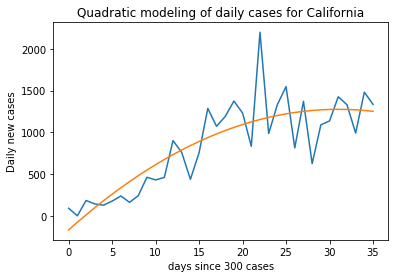

In [27]:
plt.plot(ca["days_since_threshold"], (ca["daily_new_cases"]))
plt.plot(ca["days_since_threshold"], y_hat)

plt.title("Quadratic modeling of daily cases for California")
plt.ylabel("Daily new cases")
plt.xlabel("days since {} cases".format(threshold))

$new.cases = \beta_0 + \beta_1~time + \beta_2~time^2$

In this functional form, it easy to interpret $\beta_2$ as the deceleration rate. We can calculate state by state deceleration rates.
 
If we find that a variety of policies are indeed correlated with democratic leanings, can we also see if they explain the deceleration rate?

**Or can we try to use the decelerration rates to classify whether a state is democrat or republican?**

(Maybe we could think about democratic affiliation as an instrument because it is highly correlated with time (via a suite of policy interventions), but should be uncorrelated with new cases EXCEPT through the policies we're interested in.)

### Creating a function to output betas

In [397]:
county = 12086

In [405]:
def quadratic_time_series_model_daily_cases(county, threshold=300, min_observation_days=15, plot=False,):
    """
    Function to get beta values for a quadratic time series model.
    Use county variable to specify the FIPS code for the relevant region. 
    Threshold is a scalar for the total number of cases in a region before beginning the model.
    Has an option to generate a basic plot when plot = True.
    Minimum observation days sets a minimum number of days since the threshold case value was reached to calculate the model.
    If the minimum observation days are not met, the function returns a list of nans.
    
    Returns a list of intercept, beta_1, and beta_2 in the model below
    
    daily_new_cases = beta_0 + beta_1*days_since_threshold_cases + beta_2*days_since_threshold_cases^2
    """

pd.set_option('mode.chained_assignment', None)

ids = ["FIPS","Admin2", "Province_State", "Country_Region"]

date_column_begin = 11

df = time_cases_df[ids + list(time_cases_df.columns[date_column_begin:])]

df = df[-df["FIPS"].isna()] #drop cases with no FIPS ID

df = df.melt(ids).rename(columns = {"value" : "cases"})

date = pd.to_datetime(df["variable"], format="%m/%d/%y")

df["date"] = date



county_df = df.pivot_table(values = "cases", index = [ "FIPS", "date", "Admin2", "Province_State"],  aggfunc=sum).reset_index()

county_df = county_df[county_df["FIPS"]==county]

county_df

    zero = np.array([0])

    new_cases_array = np.concatenate([zero, np.diff(county_df["cases"])])

    county_df.loc[:,"daily_new_cases"] = (new_cases_array) #Error here: A value is trying to be set on a copy of a slice from a DataFrame

    county_df = county_df[county_df["cases"] >= threshold]
    

    if len(county_df) < min_observation_days:
        return [np.nan, np.nan, np.nan]
    else:
    
        county_df["days_since_threshold"] = np.arange(0,len(county_df))

        county_df["days_since_threshold^2"] = county_df["days_since_threshold"]**2


        lm = LinearRegression()

        x = county_df[["days_since_threshold","days_since_threshold^2"]]

        y = np.array(county_df["daily_new_cases"]).reshape(-1,1)

        lm.fit(x,y)

        if plot == True:
            y_hat = lm.predict(x)
            plt.plot(county_df["days_since_threshold"], (county_df["daily_new_cases"]))
            plt.plot(county_df["days_since_threshold"], y_hat)

            plot_title_string = county_df["Admin2"].iloc[0] + ", " + county_df["Province_State"].iloc[0] + " FIPS: " + str(int(county_df["FIPS"].iloc[0]))
            plt.title("Quadratic modeling of daily cases for {}".format(plot_title_string))
            plt.ylabel("Daily new cases")
            plt.xlabel("days since {} cases".format(threshold))

        return [lm.intercept_[0], lm.coef_[0][0], lm.coef_[0][1]]

FIPS       date      Admin2 Province_State  cases
31856  12086.0 2020-01-22  Miami-Dade        Florida      0
31857  12086.0 2020-01-23  Miami-Dade        Florida      0
31858  12086.0 2020-01-24  Miami-Dade        Florida      0
31859  12086.0 2020-01-25  Miami-Dade        Florida      0
31860  12086.0 2020-01-26  Miami-Dade        Florida      0
31861  12086.0 2020-01-27  Miami-Dade        Florida      0
31862  12086.0 2020-01-28  Miami-Dade        Florida      0
31863  12086.0 2020-01-29  Miami-Dade        Florida      0
31864  12086.0 2020-01-30  Miami-Dade        Florida      0
31865  12086.0 2020-01-31  Miami-Dade        Florida      0
31866  12086.0 2020-02-01  Miami-Dade        Florida      0
31867  12086.0 2020-02-02  Miami-Dade        Florida      0
31868  12086.0 2020-02-03  Miami-Dade        Florida      0
31869  12086.0 2020-02-04  Miami-Dade        Florida      0
31870  12086.0 2020-02-05  Miami-Dade        Florida      0
31871  12086.0 2020-02-06  Miami-Dade        Florida      0
31872  12086.0 2020-02-07  Miami-Dade        Florida      0
31873  12086.0 2020-02-08  Miami-Dade        Florida      0
31874  12086.0 2020-02-09  Miami-Dade        Florida      0
31875  12086.0 2020-02-10  Miami-Dade        Florida      0
31876  12086.0 2020-02-11  Miami-Dade        Florida      0
31877  12086.0 2020-02-12  Miami-Dade        Florida      0
31878  12086.0 2020-02-13  Miami-Dade        Florida      0
31879  12086.0 2020-02-14  Miami-Dade        Florida      0
31880  12086.0 2020-02-15  Miami-Dade        Florida      0
31881  12086.0 2020-02-16  Miami-Dade        Florida      0
31882  12086.0 2020-02-17  Miami-Dade        Florida      0
31883  12086.0 2020-02-18  Miami-Dade        Florida      0
31884  12086.0 2020-02-19  Miami-Dade        Florida      0
31885  12086.0 2020-02-20  Miami-Dade        Florida      0
...        ...        ...         ...            ...    ...
31914  12086.0 2020-03-20  Miami-Dade        Florida    124
31915  12086.0 2020-03-21  Miami-Dade        Florida    169
31916  12086.0 2020-03-22  Miami-Dade        Florida    227
31917  12086.0 2020-03-23  Miami-Dade        Florida    278
31918  12086.0 2020-03-24  Miami-Dade        Florida    338
31919  12086.0 2020-03-25  Miami-Dade        Florida    400
31920  12086.0 2020-03-26  Miami-Dade        Florida    616
31921  12086.0 2020-03-27  Miami-Dade        Florida    763
31922  12086.0 2020-03-28  Miami-Dade        Florida   1003
31923  12086.0 2020-03-29  Miami-Dade        Florida   1192
31924  12086.0 2020-03-30  Miami-Dade        Florida   1632
31925  12086.0 2020-03-31  Miami-Dade        Florida   2123
31926  12086.0 2020-04-01  Miami-Dade        Florida   2202
31927  12086.0 2020-04-02  Miami-Dade        Florida   2886
31928  12086.0 2020-04-03  Miami-Dade        Florida   3364
31929  12086.0 2020-04-04  Miami-Dade        Florida   3890
31930  12086.0 2020-04-05  Miami-Dade        Florida   4146
31931  12086.0 2020-04-06  Miami-Dade        Florida   4481
31932  12086.0 2020-04-07  Miami-Dade        Florida   4997
31933  12086.0 2020-04-08  Miami-Dade        Florida   5354
31934  12086.0 2020-04-09  Miami-Dade        Florida   5745
31935  12086.0 2020-04-10  Miami-Dade        Florida   6119
31936  12086.0 2020-04-11  Miami-Dade        Florida   6487
31937  12086.0 2020-04-12  Miami-Dade        Florida   7058
31938  12086.0 2020-04-13  Miami-Dade        Florida   7459
31939  12086.0 2020-04-14  Miami-Dade        Florida   7712
31940  12086.0 2020-04-15  Miami-Dade        Florida   8066
31941  12086.0 2020-04-16  Miami-Dade        Florida   8326
31942  12086.0 2020-04-17  Miami-Dade        Florida   8824
31943  12086.0 2020-04-18  Miami-Dade        Florida   9045

[88 rows x 5 columns]

[72.37362637362651, 49.70667887667885, -1.6777167277167269]

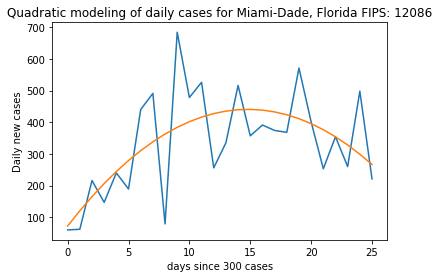

In [404]:
t = quadratic_time_series_model_daily_cases(12086, plot = True)
t

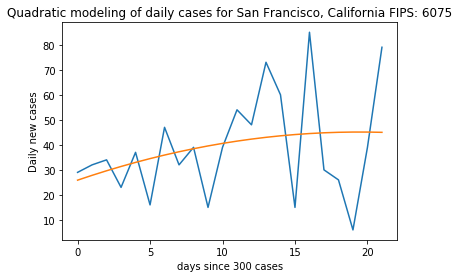

In [368]:
t = quadratic_time_series_model_daily_cases(6075, plot = True)

In [369]:
def quadratic_time_series_model_daily_cases_state(state, threshold=300, min_observation_days=15, plot=False,):
    """
    Function to get beta values for a quadratic time series model.
    Use county variable to specify the FIPS code for the relevant region. 
    Threshold is a scalar for the total number of cases in a region before beginning the model.
    Has an option to generate a basic plot when plot = True.
    Minimum observation days sets a minimum number of days since the threshold case value was reached to calculate the model.
    If the minimum observation days are not met, the function returns a list of nans.
    
    Returns a list of intercept, beta_1, and beta_2 in the model below
    
    daily_new_cases = beta_0 + beta_1*days_since_threshold_cases + beta_2*days_since_threshold_cases^2
   """
    
    pd.set_option('mode.chained_assignment', None)

    ids = ["FIPS","Admin2", "Province_State", "Country_Region"]

    date_column_begin = 11

    df = time_cases_df[ids + list(time_cases_df.columns[date_column_begin:])]

    df = df.melt(ids).rename(columns = {"value" : "cases"})


    date = pd.to_datetime(df["variable"], format="%m/%d/%y")

    df["date"] = date


    county_df = df.pivot_table(values = "cases", index = [ "Province_State", "date"],  aggfunc=sum).reset_index()


    county_df = county_df[county_df["Province_State"] == state]

    zero = np.array([0])

    new_cases_array = np.concatenate([zero, np.diff(county_df["cases"])])

    county_df.loc[:,"daily_new_cases"] = (new_cases_array) #Error here: A value is trying to be set on a copy of a slice from a DataFrame


    county_df = county_df[county_df["cases"] >= threshold]
        
    if len(county_df) < min_observation_days:
        return [np.nan, np.nan, np.nan]
    else:
    
        county_df["days_since_threshold"] = np.arange(0,len(county_df))

        county_df["days_since_threshold^2"] = county_df["days_since_threshold"]**2


        lm = LinearRegression()

        x = county_df[["days_since_threshold","days_since_threshold^2"]]

        y = np.array(county_df["daily_new_cases"]).reshape(-1,1)

        lm.fit(x,y)

        if plot == True:
            y_hat = lm.predict(x)
            plt.plot(county_df["days_since_threshold"], (county_df["daily_new_cases"]))
            plt.plot(county_df["days_since_threshold"], y_hat)

            plot_title_string = county_df["Province_State"].iloc[0]
            plt.title("Quadratic modeling of daily cases for {}".format(plot_title_string))
            plt.ylabel("Daily new cases")
            plt.xlabel("days since {} cases".format(threshold))

        return [lm.intercept_[0], lm.coef_[0][0], lm.coef_[0][1]]

[-167.83001422475104, 93.06162186069307, -1.500800889345781]

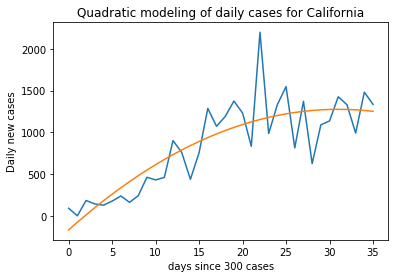

In [434]:
quadratic_time_series_model_daily_cases_state("California", plot=True)

In [386]:
#This is too slow, so I need to make  another function.

# k = []
# for state in np.unique(time_cases_df["Province_State"]):
#     k.append(quadratic_time_series_model_daily_cases_state(state))

In [420]:
def create_state_beta_table(threshold=300, min_observation_days=15):
    pd.set_option('mode.chained_assignment', None)
    
    ids = ["FIPS","Admin2", "Province_State", "Country_Region"]

    date_column_begin = 11

    df = time_cases_df[ids + list(time_cases_df.columns[date_column_begin:])]
    
    df = df[-df["FIPS"].isna()] #drop cases with no FIPS ID
    
    df = df.melt(ids).rename(columns = {"value" : "cases"})

    date = pd.to_datetime(df["variable"], format="%m/%d/%y")

    df["date"] = date
    
    df = df.pivot_table(values = "cases", index = [ "Province_State", "date"],  aggfunc=sum).reset_index()
    
    zero = np.array([0])
    
    k = []
    
    for state in np.unique(time_cases_df["Province_State"]):
        
        county_df = df[df["Province_State"] == state]

        zero = np.array([0])

        new_cases_array = np.concatenate([zero, np.diff(county_df["cases"])])

        county_df.loc[:,"daily_new_cases"] = (new_cases_array) #Error here: A value is trying to be set on a copy of a slice from a DataFrame


        county_df = county_df[county_df["cases"] >= threshold]

        if len(county_df) < min_observation_days:
            k.append([np.nan, np.nan, np.nan])
            
        else:
            county_df["days_since_threshold"] = np.arange(0,len(county_df))

            county_df["days_since_threshold^2"] = county_df["days_since_threshold"]**2

            lm = LinearRegression()

            x = county_df[["days_since_threshold","days_since_threshold^2"]]

            y = np.array(county_df["daily_new_cases"]).reshape(-1,1)

            lm.fit(x,y)

            k.append([lm.intercept_[0], lm.coef_[0][0], lm.coef_[0][1] ])
        
    state_betas = pd.DataFrame(k).rename(columns = {0:"beta0",1:"beta1",2:"beta2"})
    state_betas.index = np.unique(time_cases_df["Province_State"])

    return(state_betas)

In [421]:
create_state_beta_table()

# state_betas = pd.DataFrame(k).rename(columns = {0:"beta0",1:"beta1",2:"beta2"})
# state_betas.index = np.unique(time_cases_df["Province_State"])

# state_betas

beta0       beta1      beta2
Alabama                     66.691282   16.407425  -0.432553
Alaska                            NaN         NaN        NaN
American Samoa                    NaN         NaN        NaN
Arizona                    114.169719    8.568596  -0.228816
Arkansas                    31.641538    4.649976  -0.133855
California                -167.830014   93.061622  -1.500801
Colorado                    64.634274   32.468041  -0.852440
Connecticut                  8.756158   69.941981  -1.345922
Delaware                    48.236090   10.436075  -0.202492
Diamond Princess                  NaN         NaN        NaN
District of Columbia        47.566206    9.219862  -0.235954
Florida                   -111.679144  114.107017  -2.661420
Georgia                     13.327016   61.944147  -1.164642
Grand Princess                    NaN         NaN        NaN
Guam                              NaN         NaN        NaN
Hawaii                      45.105392   -7.680462   0.417717
Idaho                      133.914286  -11.230576   0.335840
Illinois                     5.088710   85.152419  -1.149194
Indiana                    117.587912   42.349005  -1.167369
Iowa                        61.028233    1.795049   0.193884
Kansas                      56.952569    1.814090  -0.007653
Kentucky                    51.434783    5.174478  -0.008470
Louisiana                 -254.581012  172.989383  -5.206246
Maine                       31.464662   -0.411057   0.021082
Maryland                    16.809524   49.585910  -0.817460
Massachusetts              -63.328446  101.772084  -0.979782
Michigan                   -39.433871  170.490430  -5.031364
Minnesota                   58.809615   -1.520014   0.215331
Mississippi                 64.760684    7.268718  -0.058120
Missouri                    91.720000   19.713177  -0.668562
Montana                           NaN         NaN        NaN
Nebraska                    58.191176   -7.408290   0.862072
Nevada                     100.002735    7.341929  -0.276459
New Hampshire               74.128571   -7.616792   0.442356
New Jersey                -444.286096  359.071405  -7.940885
New Mexico                  75.293233   -3.476559   0.343727
New York                 -1710.024291  751.046577 -12.603859
North Carolina              60.731527   17.490716  -0.323228
North Dakota                      NaN         NaN        NaN
Northern Mariana Islands          NaN         NaN        NaN
Ohio                       170.690887    1.924477   0.644762
Oklahoma                    56.486957   12.091530  -0.564257
Oregon                      67.017692    0.659285  -0.049118
Pennsylvania              -183.281048  140.012235  -2.800805
Puerto Rico                 38.722394    4.287023  -0.273607
Rhode Island                64.905844    9.837651   0.416895
South Carolina              50.070818   18.124005  -0.586813
South Dakota                      NaN         NaN        NaN
Tennessee                  110.797330   19.921119  -0.639758
Texas                      -36.932185   65.610413  -1.148170
Utah                        68.768889    6.886544  -0.237997
Vermont                     39.710526    0.180792  -0.130224
Virgin Islands                    NaN         NaN        NaN
Virginia                    75.034530   23.761460  -0.253939
Washington                 -12.888664   42.185897  -1.005571
West Virginia                     NaN         NaN        NaN
Wisconsin                   80.897783    9.529946  -0.281451
Wyoming                           NaN         NaN        NaN

In [422]:
#This is a bit slow, unfortunately


def create_county_beta_table(threshold=300, min_observation_days=15):
    pd.set_option('mode.chained_assignment', None)
    
    ids = ["FIPS","Admin2", "Province_State", "Country_Region"]

    date_column_begin = 11

    df = time_cases_df[ids + list(time_cases_df.columns[date_column_begin:])]
    
    df = df[-df["FIPS"].isna()] #drop cases with no FIPS ID
    
    df = df.melt(ids).rename(columns = {"value" : "cases"})

    date = pd.to_datetime(df["variable"], format="%m/%d/%y")

    df["date"] = date
    
    df = df.pivot_table(values = "cases", index = [ "FIPS", "date", "Admin2", "Province_State"],  aggfunc=sum).reset_index()
    
    zero = np.array([0])
    
    k = []
    
    for county in np.unique(time_cases_df["FIPS"]):
        
        county_df = df[df["FIPS"]==county]
        
        new_cases_array = np.concatenate([zero, np.diff(county_df["cases"])])
        
        county_df.loc[:,"daily_new_cases"] = (new_cases_array) #Error here: A value is trying to be set on a copy of a slice from a DataFrame

        county_df = county_df[county_df["cases"] >= threshold]
        
        if len(county_df) < min_observation_days:
            k.append([np.nan, np.nan, np.nan])
        else:
            county_df["days_since_threshold"] = np.arange(0,len(county_df))

            county_df["days_since_threshold^2"] = county_df["days_since_threshold"]**2


            lm = LinearRegression()

            x = county_df[["days_since_threshold","days_since_threshold^2"]]

            y = np.array(county_df["daily_new_cases"]).reshape(-1,1)

            lm.fit(x,y)
            
            k.append([lm.intercept_[0], lm.coef_[0][0], lm.coef_[0][1]])
            
    county_betas = pd.DataFrame(k).rename(columns = {0:"beta0",1:"beta1",2:"beta2"})
    county_betas.index = np.unique(time_cases_df["FIPS"])
    
    return county_betas



In [424]:
create_county_beta_table().dropna()

beta0      beta1     beta2
1073.0    28.754386  -0.049794 -0.068885
4013.0    97.765217  -0.233032  0.000621
4019.0    43.826471  -2.982547  0.228345
6001.0    34.688722   1.899027 -0.072461
6013.0    48.430147  -6.691071  0.373424
6037.0    90.358374  49.450918 -1.369911
6059.0    58.030435   0.013608 -0.010051
6065.0    55.971429  10.388722 -0.319549
6067.0    60.495356  -3.783927  0.117776
6071.0    53.564951  -1.728887  0.254377
6073.0    67.265217   5.515980 -0.283964
6075.0    25.885375   1.977414 -0.050819
6081.0    47.609740  -4.765402  0.208191
6085.0    59.887794   1.747931 -0.100547
8005.0    53.622556   1.192658 -0.021230
8031.0    57.449605  -0.465203  0.065711
8037.0    13.390931   0.946954 -0.113620
8041.0    29.166151   0.160991 -0.063983
8059.0    52.854135  -2.503524  0.046882
8123.0    45.462010   0.286870 -0.055497
9001.0    84.127595  33.665195 -1.092399
9003.0    30.466234  18.193461 -0.464001
9009.0    69.811039  24.629152 -0.652939
10003.0   95.570588 -13.760876  0.923481
11001.0   47.566206   9.219862 -0.235954
12011.0   86.542125   8.331819 -0.250305
12031.0   50.302696  -3.541282  0.136380
12057.0   49.760902  -2.370308  0.071060
12071.0   31.936275   1.001471 -0.134804
12086.0   72.373626  49.706679 -1.677717
...             ...        ...       ...
36119.0  283.847976  63.045294 -1.721669
37119.0   48.119706  -0.176080 -0.041651
39035.0   64.891304  -2.710757  0.102061
39049.0   61.709774  -4.931830  0.375940
42003.0   54.269173  -2.445260  0.050273
42017.0   51.324561   4.362552 -0.106618
42045.0   21.848701  16.983766 -0.657040
42077.0  123.122807   1.676729 -0.338235
42079.0  126.786378  -3.942982 -0.126419
42089.0   67.307534  -4.729876  0.109649
42091.0   34.551538  13.743968 -0.476543
42095.0   82.798246  -2.417505  0.017092
42101.0   68.210598  41.631449 -1.108714
44007.0   62.061404  -3.234972  1.049213
47037.0   48.360870   0.864427 -0.041897
47157.0   65.940711  -2.949972  0.223602
47165.0   19.573529  -0.290255 -0.048400
48029.0   58.823529  -2.668552  0.101325
48113.0   65.723462   1.764431  0.002926
48201.0   62.282609  33.989413 -1.449040
48439.0   32.135191   3.075335 -0.015738
48453.0   57.550052  -4.116099  0.275026
49035.0   44.527950   1.186731  0.030209
51059.0   24.075335   9.485552 -0.236842
53033.0   18.822191  14.720077 -0.362088
53053.0   56.096556  -0.712720 -0.060403
53061.0   42.068015   4.730642 -0.179107
55079.0   60.914872   3.991538 -0.183333
90034.0  630.789272 -88.909743  2.371071
90053.0   99.435501 -16.829592  0.587848

[124 rows x 3 columns]

[283.84797555385774, 63.04529436407997, -1.721669459572686]

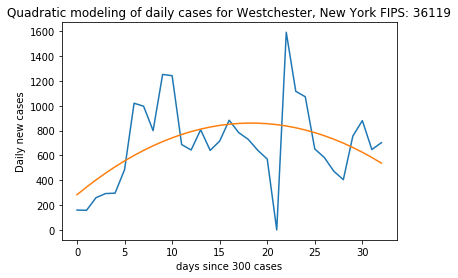

In [429]:
quadratic_time_series_model_daily_cases(36119, plot = True)

[123.12280701754386, 1.6767285861713104, -0.33823529411764713]

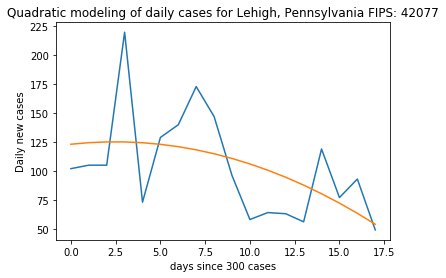

In [430]:
quadratic_time_series_model_daily_cases(42077, plot = True)